*Problema TSP con algoritmos genéticos*

In [20]:
import pandas as pd
from geopy.distance import geodesic

# Diccionario de coordenadas
coordenadas = {
    "Ciudad de México": (19.4326, -99.1332),
    "Quito": (-0.1807, -78.4678),
    "Miami": (25.7617, -80.1918),
    "San Salvador": (13.6929, -89.2182),
    "Mendoza": (-32.8895, -68.8458),
    "Guadalajara": (20.6597, -103.3496),
    "Mérida": (20.9674, -89.5926),
    "Washington D.C.": (38.9072, -77.0369),
    "Monterrey": (25.6866, -100.3161),
    "Managua": (12.1150, -86.2362),
    "Caracas": (10.4806, -66.9036),
    "Boston": (42.3601, -71.0589),
    "Buenos Aires": (-34.6037, -58.3816),
    "Nueva York": (40.7128, -74.0060),
    "Ciudad de Panamá": (8.9824, -79.5199),
    "Brasilia": (-15.8267, -47.9218),
    "Montevideo": (-34.9011, -56.1645),
    "Bogotá": (4.7110, -74.0721),
}

# Distancias geodésicas
archivo = pd.DataFrame(index=coordenadas.keys(), columns=coordenadas.keys())

# Calcular las distancias geodésicas
for ciudad1, coord1 in coordenadas.items():
    for ciudad2, coord2 in coordenadas.items():
        if ciudad1 == ciudad2:
            archivo.loc[ciudad1, ciudad2] = 0
        else:
            distancia = geodesic(coord1, coord2).kilometers
            archivo.loc[ciudad1, ciudad2] = round(distancia, 2)

archivo.to_excel("distancias_ciudades.xlsx")

In [21]:
# Librerías
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from itertools import permutations

In [22]:
# Cargar archivo de distancias
df = pd.read_excel('/content/distancias_ciudades.xlsx', index_col=0)
ciudades = list(df.columns)  # Obtener nombres de ciudades y codificar
num_ciudades = len(ciudades)
ciudades_indices = list(range(num_ciudades))

In [23]:
ciudades

['Ciudad de México',
 'Quito',
 'Miami',
 'San Salvador',
 'Mendoza',
 'Guadalajara',
 'Mérida',
 'Washington D.C.',
 'Monterrey',
 'Managua',
 'Caracas',
 'Boston',
 'Buenos Aires',
 'Nueva York',
 'Ciudad de Panamá',
 'Brasilia',
 'Montevideo',
 'Bogotá']

In [24]:
df

,Ciudad de México,Quito,Miami,San Salvador,Mendoza,Guadalajara,Mérida,Washington D.C.,Monterrey,Managua,Caracas,Boston,Buenos Aires,Nueva York,Ciudad de Panamá,Brasilia,Montevideo,Bogotá
Ciudad de México,0.00,3129.83,2067.24,1233.65,6626.35,461.53,1011.33,3029.79,703.15,1600.53,3598.58,3664.18,7372.63,3357.70,2408.55,6828.88,7535.67,3169.42
Quito,3129.83,0.00,2876.39,1938.94,3758.50,3556.97,2634.08,4330.65,3702.22,1608.07,1740.42,4769.88,4346.62,4551.13,1019.98,3775.49,4488.76,729.04
Miami,2067.24,2876.39,0.00,1635.72,6601.43,2433.25,1097.56,1487.43,2017.52,1638.51,2195.97,2022.02,7066.44,1754.35,1858.49,5778.71,7176.18,2419.27
San Salvador,1233.65,1938.94,1635.72,0.00,5591.90,1688.21,806.08,3040.13,1763.41,367.69,2454.16,3626.74,6261.04,3340.41,1179.62,5595.88,6411.72,1936.74
Mendoza,6626.35,3758.50,6601.43,5591.90,0.00,6969.90,6355.34,7993.68,7290.44,5312.39,4803.94,8335.20,987.57,8166.42,4770.19,2831.46,1193.15,4197.89
Guadalajara,461.53,3556.97,2433.25,1688.21,6969.90,0.00,1432.06,3229.14,637.42,2055.85,4057.37,3858.37,7747.76,3554.49,2866.17,7278.31,7916.24,3624.94
Mérida,1011.33,2634.08,1097.56,806.08,6355.34,1432.06,0.00,2323.57,1214.24,1042.96,2689.64,2937.95,6980.70,2639.40,1710.90,6106.37,7121.60,2459.78
Washington D.C.,3029.79,4330.65,1487.43,3040.13,7993.68,3229.14,2323.57,0.00,2625.01,3104.80,3306.49,634.38,8362.93,327.91,3324.17,6775.08,8450.00,3799.11
Monterrey,703.15,3702.22,2017.52,1763.41,7290.44,637.42,1214.24,2625.01,0.00,2107.67,3899.95,3247.93,8005.98,2946.90,2873.14,7300.91,8162.25,3636.10
Managua,1600.53,1608.07,1638.51,367.69,5312.39,2055.85,1042.96,3104.80,2107.67,0.00,2117.93,3660.08,5949.37,3387.47,812.57,5230.52,6094.87,1569.19


Población inicial: [[2, 7, 10, 13, 17, 16, 15, 3, 4, 11, 9, 12, 5, 8, 0, 1, 6, 14], [10, 4, 2, 16, 7, 1, 11, 15, 14, 5, 8, 12, 13, 17, 6, 0, 9, 3], [0, 17, 1, 11, 14, 4, 7, 8, 6, 2, 15, 3, 10, 13, 16, 9, 5, 12], [9, 6, 4, 14, 16, 1, 11, 13, 0, 5, 12, 3, 7, 2, 10, 15, 8, 17], [13, 8, 0, 11, 3, 17, 10, 5, 9, 14, 7, 6, 16, 15, 4, 2, 12, 1], [11, 8, 0, 6, 3, 10, 14, 15, 1, 16, 5, 13, 2, 12, 9, 7, 17, 4], [6, 9, 3, 10, 15, 1, 16, 14, 8, 17, 13, 2, 12, 0, 5, 7, 11, 4], [17, 0, 1, 7, 13, 6, 2, 14, 5, 15, 9, 4, 10, 3, 12, 16, 8, 11], [9, 12, 5, 11, 0, 6, 3, 1, 4, 17, 8, 7, 13, 2, 14, 15, 10, 16], [2, 16, 13, 7, 6, 4, 9, 5, 10, 17, 14, 3, 8, 15, 0, 11, 1, 12], [2, 4, 0, 12, 8, 3, 11, 16, 6, 14, 7, 13, 9, 5, 1, 10, 17, 15], [16, 5, 15, 8, 10, 14, 12, 3, 6, 9, 1, 2, 17, 0, 13, 7, 11, 4], [7, 3, 5, 2, 15, 12, 17, 0, 9, 13, 10, 14, 6, 16, 4, 8, 11, 1], [11, 13, 8, 6, 17, 4, 7, 3, 0, 12, 15, 14, 16, 9, 2, 1, 5, 10], [8, 2, 1, 7, 4, 6, 3, 16, 15, 11, 10, 14, 12, 17, 9, 0, 5, 13], [4, 7, 3, 15, 5, 6, 

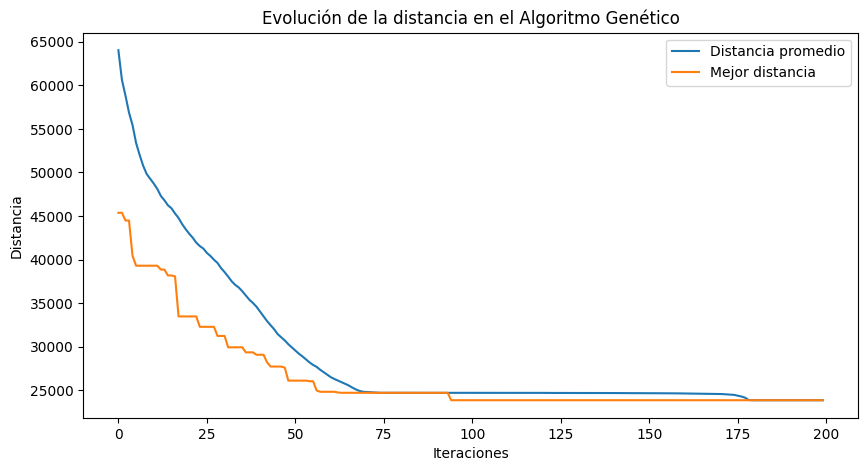

Número total de iteraciones: 200
Mejor ruta encontrada: [7, 13, 11, 2, 10, 15, 16, 12, 4, 1, 17, 14, 9, 3, 6, 0, 5, 8]
Distancia mínima: 23871.299999999996


In [27]:
# Función para calcular la distancia total de un recorrido
def distancia_total(ruta):
    distancia = sum(df.iloc[ruta[i], ruta[i+1]] for i in range(len(ruta) - 1))
    distancia += df.iloc[ruta[-1], ruta[0]]  # Regresar a la ciudad de inicio
    return distancia

# Función de aptitud (inversa de la distancia)
def aptitud(ruta):
    return 1 / distancia_total(ruta)

# Generar población inicial de 200 individuos
def poblacion_inicial(tamano=200):
    poblacion = []
    for _ in range(tamano):
        ruta = ciudades_indices.copy()
        random.shuffle(ruta)
        poblacion.append(ruta)
    return poblacion

# Selección por ranking
def seleccion_ranking(poblacion):
    ordenados = sorted(poblacion, key=aptitud, reverse=True)
    return [(ordenados[i], ordenados[i+1]) for i in range(0, len(ordenados)-1, 2)]

# Cruza PMX
def cruza_pmx(padre1, padre2):
    tamano = len(padre1)
    corte1, corte2 = sorted(random.sample(range(tamano), 2))
    hijo1, hijo2 = padre1[:], padre2[:]
    mapeo1, mapeo2 = {}, {}

    for i in range(corte1, corte2):
        mapeo1[padre2[i]] = padre1[i]
        mapeo2[padre1[i]] = padre2[i]
        hijo1[i], hijo2[i] = padre2[i], padre1[i]

    for i in range(tamano):
        if i < corte1 or i >= corte2:
            while hijo1[i] in mapeo1:
                hijo1[i] = mapeo1[hijo1[i]]
            while hijo2[i] in mapeo2:
                hijo2[i] = mapeo2[hijo2[i]]

    return hijo1, hijo2

# Mutación scramble a los peores individuos
def mutacion_scramble(ruta, i, j):
    segmento = ruta[i:j]
    random.shuffle(segmento)
    ruta[i:j] = segmento
    return ruta

def mutacion_inversa(ruta, i, j):
    ruta[i:j] = ruta[i:j][::-1]
    return ruta

def cruza_pbx(padre1, padre2):
    num_ciudades = len(padre1)
    hijo1, hijo2 = [-1] * num_ciudades, [-1] * num_ciudades

    posiciones = sorted(random.sample(range(num_ciudades), num_ciudades // 3))

    for pos in posiciones:
        hijo1[pos] = padre1[pos]
        hijo2[pos] = padre2[pos]

    def llenar_hijo(hijo, padre):
        valores_padre = set(hijo)
        idx_padre = 0

        for i in range(num_ciudades):
            if hijo[i] == -1:
                while padre[idx_padre] in valores_padre:
                    idx_padre += 1
                hijo[i] = padre[idx_padre]
                valores_padre.add(padre[idx_padre])

    llenar_hijo(hijo1, padre2)
    llenar_hijo(hijo2, padre1)

    return hijo1, hijo2

# Función de selección por torneo
def seleccion_torneo(poblacion):
    poblacion_ordenada = sorted(poblacion, key=aptitud, reverse=True)
    parejas = []
    tamano = len(poblacion_ordenada)

    for i in range(tamano // 2):
        padre1 = poblacion_ordenada[i]
        padre2 = poblacion_ordenada[tamano - i - 1]
        parejas.append((padre1, padre2))

    return parejas

poblacion_ini = poblacion_inicial()

# Algoritmo genético principal
def algoritmo_genetico():
    poblacion = poblacion_ini
    print("Población inicial:", poblacion_ini)
    prev_distancia_prom = float('inf')
    generaciones_estancadas = 0
    max_estancadas = 30
    max_iteraciones = 200
    iteracion = 0

    distancias_prom = []
    mejores_distancias = []

    while generaciones_estancadas < max_estancadas and iteracion < max_iteraciones:
        poblacion_ordenada = sorted(poblacion, key=aptitud, reverse=True)
        # SELECCIÓN TORNEO
        padres = seleccion_torneo(poblacion_ordenada)
        descendencia = []

        for padre1, padre2 in padres:
            # CRUZA PBx
            hijo1, hijo2 = cruza_pbx(padre1, padre2)
            descendencia.extend([hijo1, hijo2])

        poblacion = poblacion_ordenada + descendencia

        # Reordenamiento
        poblacion = sorted(poblacion, key=aptitud, reverse=True)

        i, j = sorted(random.sample(range(len(poblacion[0])), 2))

        if generaciones_estancadas >= 5:
            for i in range(-20, 0):
                # MUTACIÓN INVERSA
                poblacion[i] = mutacion_inversa(poblacion[i], i, j)

        # Aplicar elitismo
        poblacion = sorted(poblacion, key=aptitud, reverse=True)[:200]

        distancia_prom = np.mean([distancia_total(ind) for ind in poblacion])
        mejor_distancia = distancia_total(poblacion[0])
        distancias_prom.append(distancia_prom)
        mejores_distancias.append(mejor_distancia)

        if abs(prev_distancia_prom - distancia_prom) < 1e-3:
            generaciones_estancadas += 1
        else:
            generaciones_estancadas = 0

        prev_distancia_prom = distancia_prom
        iteracion += 1

    plt.figure(figsize=(10, 5))
    plt.plot(range(iteracion), distancias_prom, label='Distancia promedio')
    plt.plot(range(iteracion), mejores_distancias, label='Mejor distancia')
    plt.xlabel('Iteraciones')
    plt.ylabel('Distancia')
    plt.title('Evolución de la distancia en el Algoritmo Genético')
    plt.legend()
    plt.show()

    print(f"Número total de iteraciones: {iteracion}")

    mejor_ruta = poblacion[0]
    return mejor_ruta, mejor_distancia

mejor_ruta, mejor_distancia = algoritmo_genetico()
print("Mejor ruta encontrada:", mejor_ruta)
print("Distancia mínima:", mejor_distancia)
